# Load packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Runtimes of benchmark queries on Couchbase

In [ ]:
# Run times are listed as the sequence of ssb, tpch and imdb.
CB = [600, 341, 8.91, 600, 600, 600, 600, 578, 3.44, 3.27, 600, 600, 600, 
      36.32, 600, 600, 600, 600, 600, 6.32, 184.29, 412.11, 58.38, 
      305, 600, 95, 11.05, 600]

# postgres with ML predicted plan (transferring postgres)
CB_pg = [54.49,  27.01,5.41,346.00,382.30,382.10,58.67,12.24,2.53,2.22,493.17,68.83,66.21,  52.48,56.57,98.21,77.06,12.57,40.38,7.08,2.46,74.78,3.64,
          21, 37.7, 22.51, 4.26, 142.89]

# postgres with ML predicted plan (transferring mssql)
CB_mssql = [54.49,  27.01,5.41,346.00,382.30,382.10,58.67,12.24,2.53,2.22,493.17,68.83,66.21, 52.48,56.57,98.21,77.06,12.57,40.38,7.08,2.46,187.75,3.64,
          21, 37.7, 22.51, 140.32, 142.89]

# Plot figure

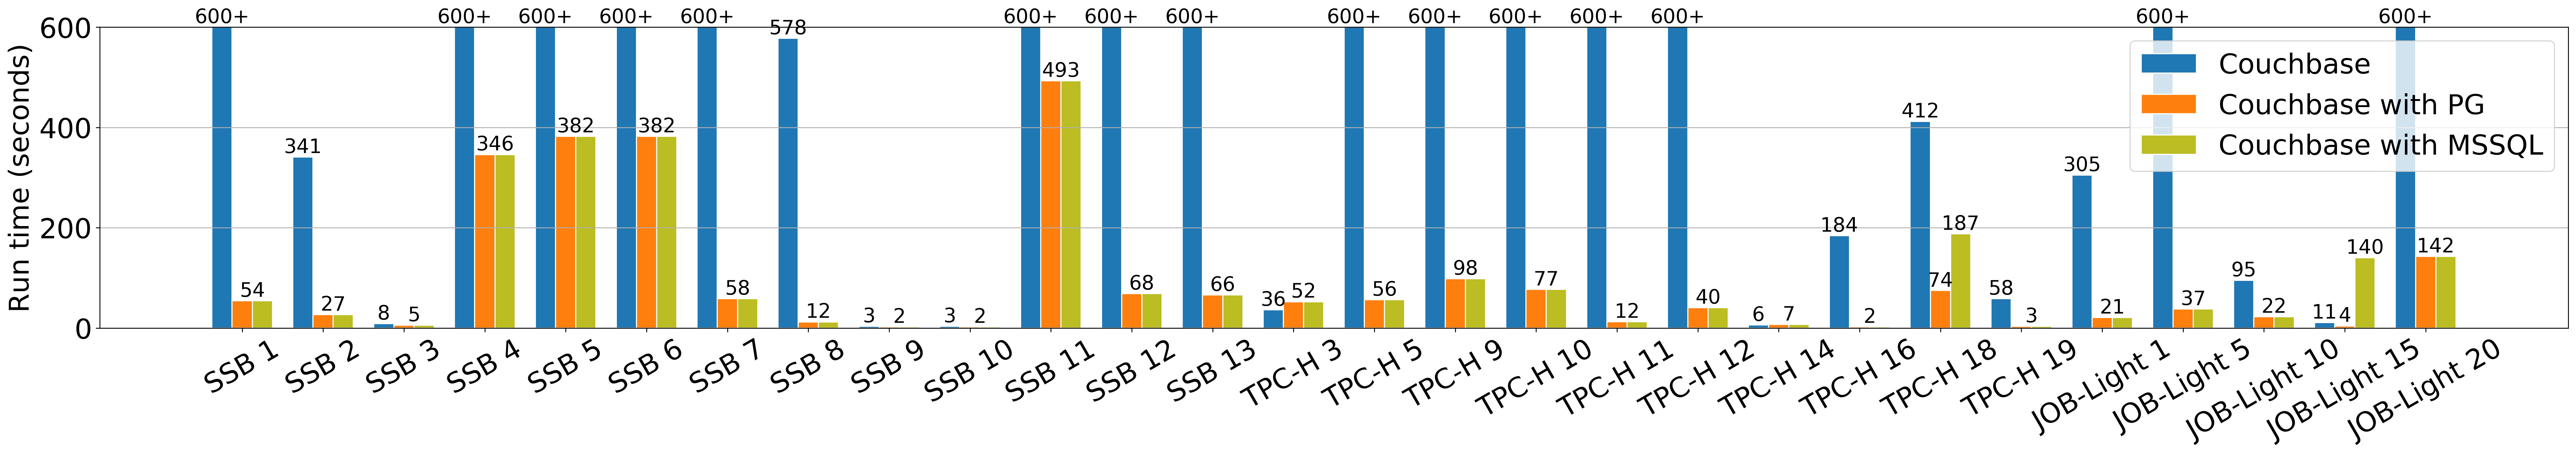

In [5]:
# set width of bar
barWidth = 0.25

ssb = [i for i in range(13)]
tpch = [13 + i for i in range(10)]
job = [10 + 13 + i for i in range(5)]
 
# Set position of bar on X axis
r1 = [i for i in range(28)]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(40, 5), dpi=300)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0, 600])
plt.grid(axis='y')
# Make the plot
bar1 = plt.bar(r1, CB, color='tab:blue', width=barWidth, edgecolor='white', label='Couchbase')
bar2 = plt.bar(r2, CB_pg, color='tab:orange', width=barWidth, edgecolor='white', label='Couchbase with PG')
bar3 = plt.bar(r3, CB_mssql, color='tab:olive', width=barWidth, edgecolor='white', label='Couchbase with MSSQL') 


for rect in bar1:
    height = rect.get_height()
    if int(height) < 600:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=18)
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '600+', ha='center', va='bottom', fontsize=18)
        

for idx, rect in enumerate(bar2):
    height = rect.get_height()
    if int(height) < 600 and CB_pg[idx] != CB_mssql[idx]:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=18)
    if int(height) < 600 and CB_pg[idx] == CB_mssql[idx]:
        plt.text(rect.get_x() + rect.get_width()/2.0 + 0.5 * barWidth, height, '%d' % int(height), ha='center', va='bottom', fontsize=18)
    
    
for idx, rect in enumerate(bar3):
    height = rect.get_height()
    if int(height) < 600 and CB_pg[idx] != CB_mssql[idx]:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=18)

    
# Add xticks on the middle of the group bars
# plt.xlabel('', fontweight='bold')
ticks = [f'SSB {i+1}' for i in range(13)] + [f'TPC-H {i}' for i in [3, 5, 9, 10, 11, 12, 14, 16, 18, 19]] + ['JOB-Light 1', 'JOB-Light 5', 'JOB-Light 10', 'JOB-Light 15', 'JOB-Light 20']
plt.xticks([r + 1*barWidth for r in r1], ticks, rotation = 30)
axes.tick_params(axis='x', which='major', labelsize=25)
axes.tick_params(axis='y', which='major', labelsize=25)

# Create legend & Show graphic
plt.ylabel('Run time (seconds)' , fontsize=25)
plt.legend(prop={'size': 25})
plt.savefig(f'./figures/exp3-couchbase-runtime.pdf', bbox_inches = 'tight',pad_inches = 0)
plt.show()